In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dstrain = pd.read_csv("train.csv")

In [3]:
dstest = pd.read_csv("test.csv")

In [4]:
dstrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dstest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
dstrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
dstest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [8]:
dstrain.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
dstest.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [10]:
dstrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
dstest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
dstrain.drop(['Cabin'],axis=1,inplace=True)

In [13]:
dstest.drop(['Cabin'],axis=1,inplace=True)

In [14]:
dstrain.drop(['Name'],axis=1,inplace=True)

In [15]:
dstest.drop(['Name'],axis=1,inplace=True)

In [16]:
dstrain.drop(['Ticket'],axis=1,inplace=True)

In [17]:
dstest.drop(['Ticket'],axis=1,inplace=True)

In [18]:
dstrain['Age']=dstrain['Age'].fillna(dstrain['Age'].mean())

In [19]:
dstest['Age']=dstest['Age'].fillna(dstest['Age'].mean())

In [20]:
dstrain['Embarked']=dstrain['Embarked'].fillna(dstrain['Embarked'].mode()[0])

In [21]:
dstest['Fare']=dstest['Fare'].fillna(dstest['Fare'].mean())

In [22]:
dstrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [23]:
dstest.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

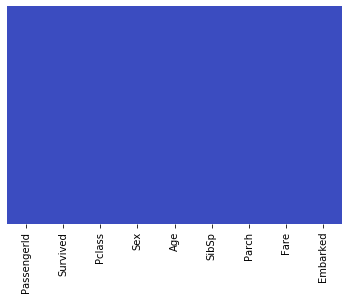

In [24]:
import seaborn as sns
sns.heatmap(dstrain.isnull(), yticklabels=False,cbar=False,cmap='coolwarm')

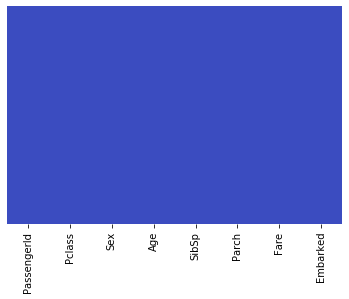

In [25]:
import seaborn as sns
sns.heatmap(dstest.isnull(), yticklabels=False,cbar=False,cmap='coolwarm')

In [26]:
dstrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [27]:
dstest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [28]:
dstrain.shape

(891, 9)

In [29]:
dstest.shape

(418, 8)

In [30]:
#convert categorial fields through get dummies command in dataset variable
dataset = pd.get_dummies(dstrain, columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])

In [31]:
#convert categorial fields through get dummies command in dataset variable
dataset1 = pd.get_dummies(dstest, columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])

In [32]:
#scaling of features to scale down of distribution in dataset variable
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#a = StandardScaler()
#columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#dataset[columns_to_scale] = a.fit_transform(dataset[columns_to_scale])

In [33]:
dataset.shape

(891, 26)

In [34]:
dataset1.shape

(418, 26)

In [35]:
dataset.tail()

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
886,887,0,27.000000,13.00,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
887,888,1,19.000000,30.00,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
888,889,0,29.699118,23.45,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
889,890,1,26.000000,30.00,1,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
890,891,0,32.000000,7.75,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0


In [36]:
dataset1.tail()

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
413,1305,30.27259,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
414,1306,39.00000,108.9000,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
415,1307,38.50000,7.2500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
416,1308,30.27259,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
417,1309,30.27259,22.3583,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0


In [37]:
final=pd.concat([dataset, dataset1], axis=0)

In [38]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 27 columns):
Age            1309 non-null float64
Embarked_C     1309 non-null uint8
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
Fare           1309 non-null float64
Parch_0        1309 non-null uint8
Parch_1        1309 non-null uint8
Parch_2        1309 non-null uint8
Parch_3        1309 non-null uint8
Parch_4        1309 non-null uint8
Parch_5        1309 non-null uint8
Parch_6        1309 non-null uint8
Parch_9        418 non-null float64
PassengerId    1309 non-null int64
Pclass_1       1309 non-null uint8
Pclass_2       1309 non-null uint8
Pclass_3       1309 non-null uint8
Sex_female     1309 non-null uint8
Sex_male       1309 non-null uint8
SibSp_0        1309 non-null uint8
SibSp_1        1309 non-null uint8
SibSp_2        1309 non-null uint8
SibSp_3        1309 non-null uint8
SibSp_4        1309 non-null uint8
SibSp_5        1309 non-null uint8
SibSp_8       

In [39]:
final.shape

(1309, 27)

In [40]:
final=final.loc[:,~final.columns.duplicated()]

In [41]:
final.shape

(1309, 27)

In [42]:
final.isnull().sum()

Age              0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Fare             0
Parch_0          0
Parch_1          0
Parch_2          0
Parch_3          0
Parch_4          0
Parch_5          0
Parch_6          0
Parch_9        891
PassengerId      0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Sex_female       0
Sex_male         0
SibSp_0          0
SibSp_1          0
SibSp_2          0
SibSp_3          0
SibSp_4          0
SibSp_5          0
SibSp_8          0
Survived       418
dtype: int64

In [43]:
final['Parch_9']=final['Parch_9'].fillna(final['Parch_9'].mean())

In [44]:
final.isnull().sum()

Age              0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Fare             0
Parch_0          0
Parch_1          0
Parch_2          0
Parch_3          0
Parch_4          0
Parch_5          0
Parch_6          0
Parch_9          0
PassengerId      0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Sex_female       0
Sex_male         0
SibSp_0          0
SibSp_1          0
SibSp_2          0
SibSp_3          0
SibSp_4          0
SibSp_5          0
SibSp_8          0
Survived       418
dtype: int64

In [45]:
m_train=final.iloc[:890,:]
m_test=final.iloc[891:,]

In [46]:
m_test.head()

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,...,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Survived
0,34.5,0,1,0,7.8292,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,NaN
1,47.0,0,0,1,7.0000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,NaN
2,62.0,0,1,0,9.6875,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,NaN
3,27.0,0,0,1,8.6625,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,NaN
4,22.0,0,0,1,12.2875,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,NaN


In [47]:
m_test.drop(['Survived'],axis=1, inplace=True)

In [48]:
m_train.shape

(890, 27)

In [49]:
m_test.shape

(418, 26)

In [50]:
X_train=m_train.drop(['Survived'],axis=1)
y_train=m_train['Survived']

In [52]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [53]:
y_pred=random_forest_model.predict(m_test)

In [54]:
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [55]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId', 'Survived']
datasets.to_csv('gender_submission.csv', index=False)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#randomforest_classifier = RandomForestClassifier(n_estimators=10)
# n_estimators=10 is not working so we use random_state=10

randomforest_classifier = RandomForestClassifier(random_state=10)
score=cross_val_score(randomforest_classifier,X_train,y_train,cv=10)

In [57]:
score.mean()

0.8034618658495063